

## Professor: Rogério Martins Gomes

## Alunos: Aritana Noara Costa Santos  e Victor Augusto Januário da Cruz

 ## 2. Regressão linear com múltiplas variáveis

In [1]:
import pandas as pd
import numpy as np


filename = './salaryData3dimensions.csv'

#Anos Experiência, Anos de Estudo, Salario

data = pd.read_csv(filename,sep=',',header=None).values


print(pd.read_csv(filename,sep=',',header=None))


       0   1         2
0    1.1  17   39343.0
1    1.3  12   46205.0
2    1.4  20   60100.0
3    1.5  14   37731.0
4    2.0  17   43525.0
5    2.2  15   39891.0
6    2.3  17   81300.0
7    2.9  17   56642.0
8    3.0  12   60150.0
9    3.2  20   54445.0
10   3.2   9   64445.0
11   3.7  10   57189.0
12   3.8  20   91728.0
13   3.9  17   63218.0
14   4.0  17   55794.0
15   4.0  12   56957.0
16   4.1  15   57081.0
17   4.2  17   59000.0
18   4.5  11   91111.0
19   4.9  20   67938.0
20   5.1   9   66029.0
21   5.3  15   83088.0
22   5.9  24   81363.0
23   6.0  24   11940.0
24   6.8  17   91738.0
25   7.1  17   98273.0
26   7.9  17  101302.0
27   8.2  20  113812.0
28   8.7  20  109431.0
29   9.0  20  105582.0
30   9.3  24  145582.0
31   9.5  20  116969.0
32   9.6  20  112635.0
33  10.3  24  122391.0
34  10.5  24  121872.0
35  10.5  24  151872.0


In [2]:
#Funções
import math 

def DesvioPadrao(mean,numberOfPoints,points):
    serie = 0
    for i in range(numberOfPoints):
        serie = serie + (points[i] - mean)**2
    sd = math.sqrt(serie/numberOfPoints)
    return sd

def media(vetor):
    resultado = 0
    for i in range(len(vetor)):
        resultado = resultado + vetor[i]
    return resultado / len(vetor)

def desvioPadrao(mean,numberOfPoints,points):
    serie = 0
    for i in range(numberOfPoints):
        serie = serie + (points[i] - mean)**2
    sd = math.sqrt(serie/numberOfPoints)
    return sd

def subtrairValorMedio(vetor,media):
    resultado = []
    for i in range(len(vetor)):
        resultado.append(vetor[i]-media)
    return resultado   

def dividirPeloDesvioPadrao(vetor, desvioPadrao):
    resultado = []
    for i in range(len(vetor)):
        resultado.append(vetor[i]/desvioPadrao)
    return resultado  

### Feature Normalization

In [3]:
# Calculating mean and standard deviation
import statistics


#definindo os eixos , teta0 + teta1*x1 + teta2 * x2
x0 = 1
x1 = data[:, 0]#anos experiencia
x2 = data[:, 1]#anos de estudo
y = data[:, 2]#Salário
n = 2 # numero de features [x1,x2]
size = len(x1)

#Media e desvio Padrão

meanX1 = media(x1)
meanX2 = media(x2)
meanY = media(y)

sdX1 = desvioPadrao(meanX1,size,x1)
sdX2 = desvioPadrao(meanX2,size,x2)
sdY = desvioPadrao(meanY,size,y)


x1 = subtrairValorMedio(x1,meanX1)
x2 = subtrairValorMedio(x2,meanX2)
y1 = subtrairValorMedio(y,meanY)

x1 = dividirPeloDesvioPadrao(x1, sdX1)
x2 = dividirPeloDesvioPadrao(x2, sdX2)
y1 = dividirPeloDesvioPadrao(y1, sdY)

print("Features foram normalizadas")

Features foram normalizadas


### Funções

In [4]:
import matplotlib.pyplot as plt
import numpy as np



def Dj_dteta0(teta0, teta1, teta2, x1, x2, y, m):
    resultado = 0
    for i in range (m):
        resultado = resultado + (teta0 + teta1 * x1[i]+ teta2 * x2[i] - y[i])
    return resultado/m
        
def Dj_dteta1(teta0, teta1, teta2, x1, x2, y, m):
    resultado = 0
    for i in range (m):
        resultado = resultado + (teta0 + teta1 * x1[i]+ teta2 * x2[i] - y[i])*x1[i]
    return resultado/m    

def Dj_dteta2(teta0, teta1, teta2, x1, x2, y, m):
    resultado = 0
    for i in range (m):
        resultado = resultado + (teta0 + teta1 * x1[i]+ teta2 * x2[i] - y[i])*x2[i]
    return resultado/m   

def FuncaoCusto(teta0, teta1,teta2, x1,x2, y, m):
    resultado = 0
    custo = []
    for i in range (m):
        custo.append(((teta0 + teta1 * x1[i] + teta2 * x2[i])- y[i])**2)        
    for i in range (m):    
        resultado = resultado + custo[i]
    return resultado/(2*m)        

def plotGrafico(x,y,h):
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in 10,000s")
    plt.plot(x,y,'x',label="Training data")
    plt.plot(x,h,label="Linear regression")   
    plt.legend(loc='upper left', frameon=False)
    plt.show()
    
def plotGrafico3d(x1,x2,y,h):    

    fig = plt.figure()    
    ax = plt.axes(projection ='3d')
    z = x1
    x = x2
    y = h

    # plotting
    ax.plot3D(x, z, h, 'green')
    ax.set_title('3D line plot geeks for geeks')
    plt.show() 

In [5]:
def RRplotGrafico3d(x1,x2,y,h):     

    fig = plt.figure()
    ax.plot_surface(xx, yy, z, alpha=0.2)
    
    ax = plt.axes(projection ='3d')
    z = x1
    x = x2
    y = h

    
    # plotting
    ax.plot3D(x, y, z, 'green')
    ax.set_title('3D line plot geeks for geeks')
    plt.show()    
    

## Execução

In [6]:
#Definir Valores iniciais
# vetor x e vetor y ja foram definidos anteriormente

def executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2):
    m = len(x1)
    h = []
    #para impressao
    vetorCusto = []
    vetorNumeroIteracoes = []        
    vetorTeta0 = []
    vetorTeta1 = []
    vetorTeta2 = []  
    
    #teta0 + teta1*x1 + teta2 * x2 
    for i in range(NoIteracoes):
        dj_dteta0 = Dj_dteta0(teta0, teta1, teta2, x1, x2, y1, m)
        temp0 = teta0 - alfa * dj_dteta0

        dj_dteta1 = Dj_dteta1(teta0, teta1, teta2, x1, x2, y1, m)
        temp1 = teta1 - alfa * dj_dteta1

        dj_dteta2 = Dj_dteta2(teta0, teta1, teta2, x1, x2, y1, m)
        temp2 = teta1 - alfa * dj_dteta2  

        #atualiza parametros      
        teta0 = temp0
        teta1 = temp1   
        teta2 = temp2

        #custo e iteracoes para serem plotados
        vetorTeta0.append(teta0)
        vetorTeta1.append(teta1)
        vetorTeta2.append(teta2) 
        
        #imprimir grafico da regressão linear
        for i in range(m):   
            h.append(teta0 + teta1 * x1[i] + teta2 * x2[i])
        plotGrafico3d(x1,x2,y,h)


    

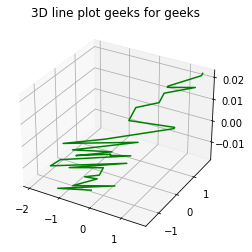

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (72,)  and requested shape (36,)

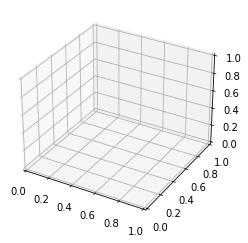

In [7]:
x1 = x1 #vetorx
x2 = x2 #vetory
y1 = y1
teta0 = 0
teta1 = 0
teta2 = 0
alfa = 0.01
NoIteracoes = 1000

executarIteracoes(alfa,NoIteracoes,x1,x2,teta0,teta1,teta2)
